NOTEBOOK WHERE DEEPLABV3 

Lets try the model in the Nelissen data.

In [32]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models
from PIL import Image

# Configura el dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar modelo
model = models.segmentation.deeplabv3_resnet50(pretrained=False, num_classes=12)
state_dict = torch.load(r"C:\Users\solaa\SEM6\facade-analysis-ai\deeplabv3_phase1.pth", map_location=device)
filtered_state_dict = {k: v for k, v in state_dict.items() if not k.startswith("aux_classifier.")}
model.load_state_dict(filtered_state_dict, strict=False)
model.to(device)
model.eval()

# Lista de rutas de imagen
image_paths = [
    r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 1 5166.png",
    r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 2 5148.png",
    r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 2 5166.png",
    r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 2 5172.png",
    r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 3 5184.png",
    r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 4 5148.png",
    r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 4 5166.png",
    r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 6 5148.png",
    r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 5148.png",
    r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 5166.png",
    r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 5172.png",
    r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 5173.png"
]

# Carpeta para guardar overlays
overlay_dir = r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Overlays"
os.makedirs(overlay_dir, exist_ok=True)

# Procesar cada imagen
for image_path in image_paths:
    filename = os.path.basename(image_path)
    name, _ = os.path.splitext(filename)

    # Cargar imagen original sin redimensionar
    image = Image.open(image_path).convert("RGB")
    image_np = np.array(image)
    image_tensor = torch.from_numpy(image_np).permute(2, 0, 1).float() / 255.0
    image_tensor = image_tensor.unsqueeze(0).to(device)

    # Inferencia
    with torch.no_grad():
        output = model(image_tensor)['out']
        prediction = torch.argmax(output, dim=1).squeeze(0).cpu().numpy()

    # Visualización overlay
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(image_np)
    axs[0].set_title("Input Image")
    axs[0].axis("off")

    axs[1].imshow(prediction, cmap="tab20", vmin=0, vmax=11)
    axs[1].set_title("Prediction")
    axs[1].axis("off")

    axs[2].imshow(image_np)
    axs[2].imshow(prediction, cmap="tab20", vmin=0, vmax=11, alpha=0.5)
    axs[2].set_title("Overlay")
    axs[2].axis("off")

    # Guardar overlay
    overlay_path = os.path.join(overlay_dir, f"{name}_overlay.png")
    plt.savefig(overlay_path, bbox_inches='tight')
    plt.close()

    print(f"Procesada y guardada: {filename}")


Procesada y guardada: Facade Nelissen 1 5166.png
Procesada y guardada: Facade Nelissen 2 5148.png
Procesada y guardada: Facade Nelissen 2 5166.png
Procesada y guardada: Facade Nelissen 2 5172.png
Procesada y guardada: Facade Nelissen 3 5184.png
Procesada y guardada: Facade Nelissen 4 5148.png
Procesada y guardada: Facade Nelissen 4 5166.png
Procesada y guardada: Facade Nelissen 6 5148.png
Procesada y guardada: Facade Nelissen 5148.png
Procesada y guardada: Facade Nelissen 5166.png
Procesada y guardada: Facade Nelissen 5172.png
Procesada y guardada: Facade Nelissen 5173.png


Intentando cargar: C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Overlays\Facade Nelissen 1 5166_overlay.png


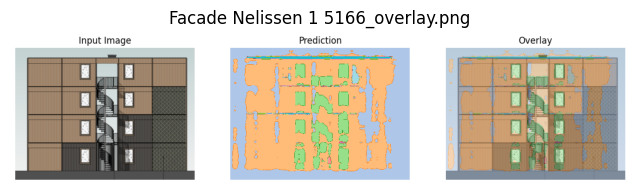

Intentando cargar: C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Overlays\Facade Nelissen 2 5148_overlay.png


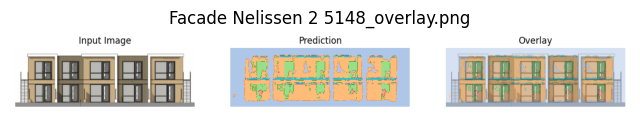

Intentando cargar: C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Overlays\Facade Nelissen 2 5166_overlay.png


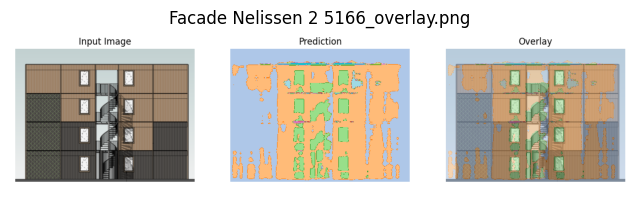

Intentando cargar: C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Overlays\Facade Nelissen 2 5172_overlay.png


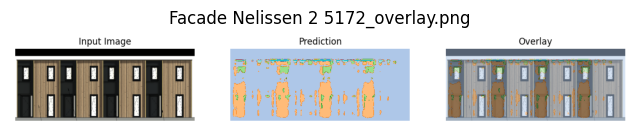

Intentando cargar: C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Overlays\Facade Nelissen 3 5184_overlay.png


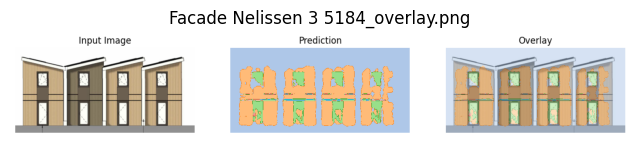

Intentando cargar: C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Overlays\Facade Nelissen 4 5148_overlay.png


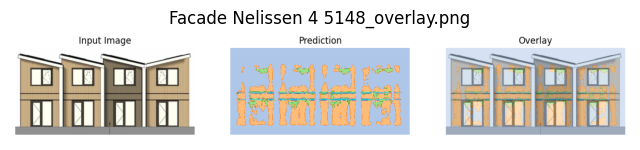

Intentando cargar: C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Overlays\Facade Nelissen 4 5166_overlay.png


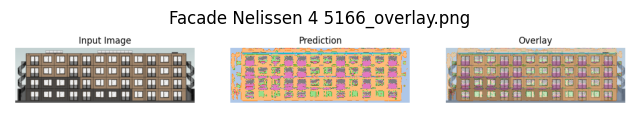

Intentando cargar: C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Overlays\Facade Nelissen 6 5148_overlay.png


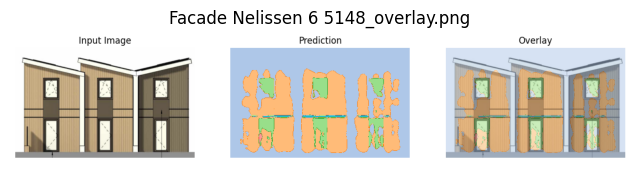

Intentando cargar: C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Overlays\Facade Nelissen 5148_overlay.png


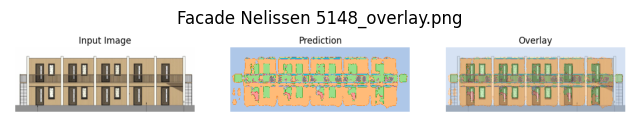

Intentando cargar: C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Overlays\Facade Nelissen 5166_overlay.png


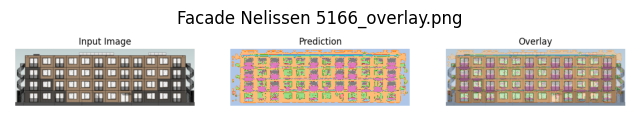

Intentando cargar: C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Overlays\Facade Nelissen 5172_overlay.png


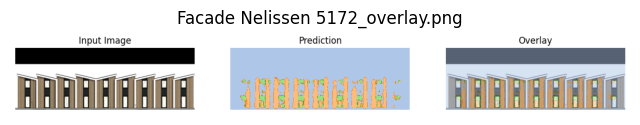

Intentando cargar: C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Overlays\Facade Nelissen 5173_overlay.png


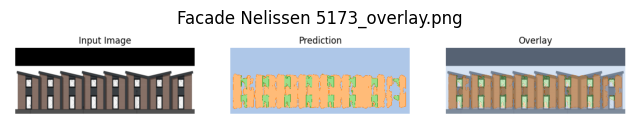

In [34]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ruta a las imágenes overlay ya guardadas
overlay_dir = r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Overlays"

# Lista de nombres de archivos overlay
overlay_images = [
    "Facade Nelissen 1 5166_overlay.png",
    "Facade Nelissen 2 5148_overlay.png",
    "Facade Nelissen 2 5166_overlay.png",
    "Facade Nelissen 2 5172_overlay.png",
    "Facade Nelissen 3 5184_overlay.png",
    "Facade Nelissen 4 5148_overlay.png",
    "Facade Nelissen 4 5166_overlay.png",
    "Facade Nelissen 6 5148_overlay.png",
    "Facade Nelissen 5148_overlay.png",
    "Facade Nelissen 5166_overlay.png",
    "Facade Nelissen 5172_overlay.png",
    "Facade Nelissen 5173_overlay.png"
]

# Mostrar imágenes una por una
for image_name in overlay_images:
    image_path = os.path.join(overlay_dir, image_name)
    print(f"Intentando cargar: {image_path}")  # Esto ayuda a depurar

    if os.path.exists(image_path):
        img = mpimg.imread(image_path)
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.title(image_name, fontsize=12)
        plt.axis("off")
        plt.show()
    else:
        print(f"Imagen no disponible: {image_name}")


RESULTS OF PREPROCESSED VS NOT PREPROCESSED

It is evident that preprocessing the image leads to some unintended consequences. While certain classes like windows are successfully detected, the grey area in the image is mistakenly classified as a wall, which is undesirable. In contrast, the unprocessed image yields more accurate results overall.

Results Preprocessed

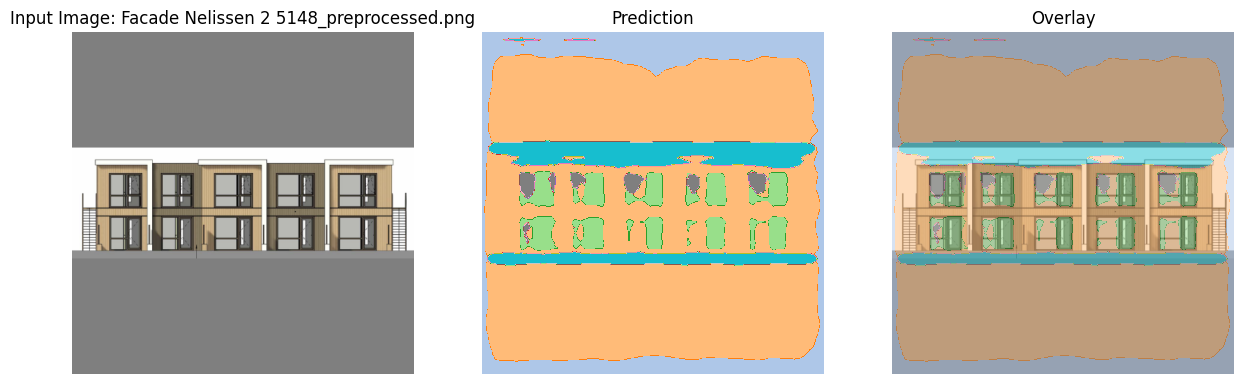

In [12]:


import torch
from torchvision import models
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Configura el dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Carga el modelo
model = models.segmentation.deeplabv3_resnet50(pretrained=False, num_classes=12)  # Ajusta num_classes si es necesario
state_dict = torch.load(r"C:\Users\solaa\SEM6\facade-analysis-ai\deeplabv3_phase1.pth", map_location=device)
# Elimina las claves del aux_classifier
filtered_state_dict = {k: v for k, v in state_dict.items() if not k.startswith("aux_classifier.")}
model.load_state_dict(filtered_state_dict, strict=False)

model.to(device)

# Ruta de la imagen
image_path = r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Preprocessed\Facade Nelissen 2 5148_preprocessed.png"

# Carga y preprocesa la imagen
image = Image.open(image_path).convert("RGB")
resize_size = (512, 512)
image = image.resize(resize_size, Image.Resampling.LANCZOS)
image_np = np.array(image)
image_tensor = torch.from_numpy(image_np).permute(2, 0, 1).float() / 255.0
image_tensor = image_tensor.unsqueeze(0).to(device)

# Inferencia
model.eval()
with torch.no_grad():
    output = model(image_tensor)['out']
    prediction = torch.argmax(output, dim=1).squeeze(0).cpu().numpy()

# Visualización
plt.figure(figsize=(15, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(image_np)
plt.title(f"Input Image: {os.path.basename(image_path)}")
plt.axis("off")

# Predicción
plt.subplot(1, 3, 2)
plt.imshow(prediction, cmap="tab20", vmin=0, vmax=11)
plt.title("Prediction")
plt.axis("off")

# Superposición
plt.subplot(1, 3, 3)
plt.imshow(image_np)
plt.imshow(prediction, cmap="tab20", vmin=0, vmax=11, alpha=0.5)
plt.title("Overlay")
plt.axis("off")

plt.show()


Results Not Preprocessed

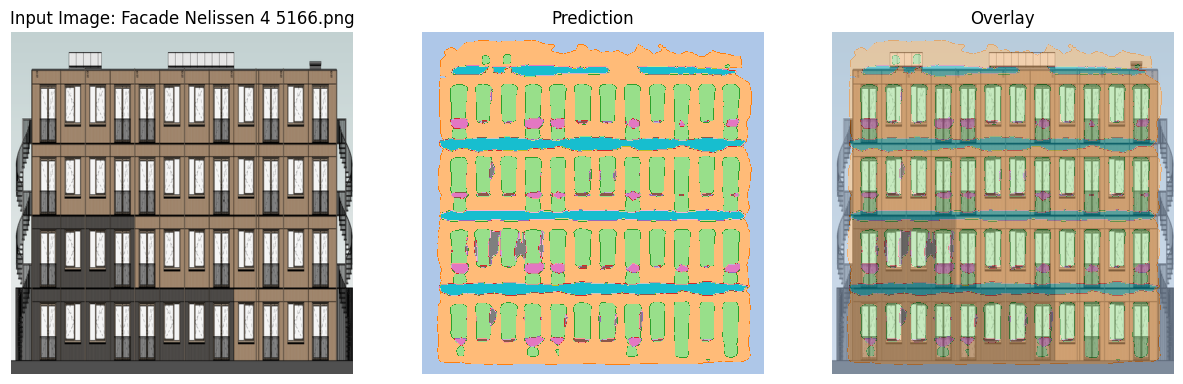

In [6]:



import torch
from torchvision import models
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Configura el dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Carga el modelo
model = models.segmentation.deeplabv3_resnet50(pretrained=False, num_classes=12)  # Ajusta num_classes si es necesario
state_dict = torch.load(r"C:\Users\solaa\SEM6\facade-analysis-ai\deeplabv3_phase1.pth", map_location=device)
# Elimina las claves del aux_classifier
filtered_state_dict = {k: v for k, v in state_dict.items() if not k.startswith("aux_classifier.")}
model.load_state_dict(filtered_state_dict, strict=False)

model.to(device)

# Ruta de la imagen
image_path = r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 4 5166.png"

# Carga y preprocesa la imagen
image = Image.open(image_path).convert("RGB")
resize_size = (512, 512)
image = image.resize(resize_size, Image.Resampling.LANCZOS)
image_np = np.array(image)
image_tensor = torch.from_numpy(image_np).permute(2, 0, 1).float() / 255.0
image_tensor = image_tensor.unsqueeze(0).to(device)

# Inferencia
model.eval()
with torch.no_grad():
    output = model(image_tensor)['out']
    prediction = torch.argmax(output, dim=1).squeeze(0).cpu().numpy()

# Visualización
plt.figure(figsize=(15, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(image_np)
plt.title(f"Input Image: {os.path.basename(image_path)}")
plt.axis("off")

# Predicción
plt.subplot(1, 3, 2)
plt.imshow(prediction, cmap="tab20", vmin=0, vmax=11)
plt.title("Prediction")
plt.axis("off")

# Superposición
plt.subplot(1, 3, 3)
plt.imshow(image_np)
plt.imshow(prediction, cmap="tab20", vmin=0, vmax=11, alpha=0.5)
plt.title("Overlay")
plt.axis("off")

plt.show()
